### Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

### Problem Sstatement 

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
## Display top 5 rows
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
## Display last 5 rows
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


### adding target column "affair"

In [7]:
## 1 represents having affairs, 0 represents not
df["affair"] = (df.affairs > 0).astype(int)

In [8]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


### Columns Describes

------------------------------------------------------------------------------------------------------------
rate_marriage = woman's rating of her marriage (1 = very poor, 5 = very good)

age = woman's age

yrs_married = number of years married

children = number of children

religious = woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ = level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
    
occupation = woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 
    6 = professional with advanced degree)

occupation_husb = husband's occupation

affairs = time spent in extra-marital affairs

affair = 1 represents having affairs, 0 represents not

-------------------------------------------------------------------------------------------------------------------

### Data Profiling

In [9]:
# number of rows and columns
df.shape

(6366, 10)

There are 6366 rows and 10 columns.

In [10]:
# Number of missing values per column 
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [11]:
# data types of columns
df.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

In [12]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (1039, 10)


### Statistical Describes

The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [13]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [14]:
### Correlation between features 
df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


### Graph-Based EDA

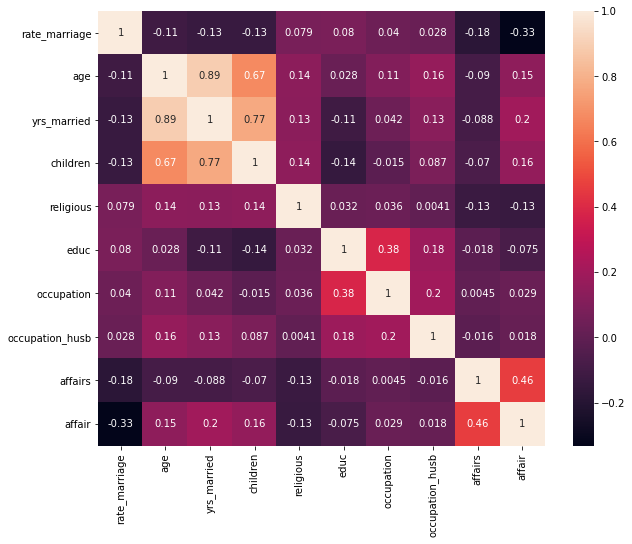

In [15]:
## Correlation Heatmaps
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(),annot = True)

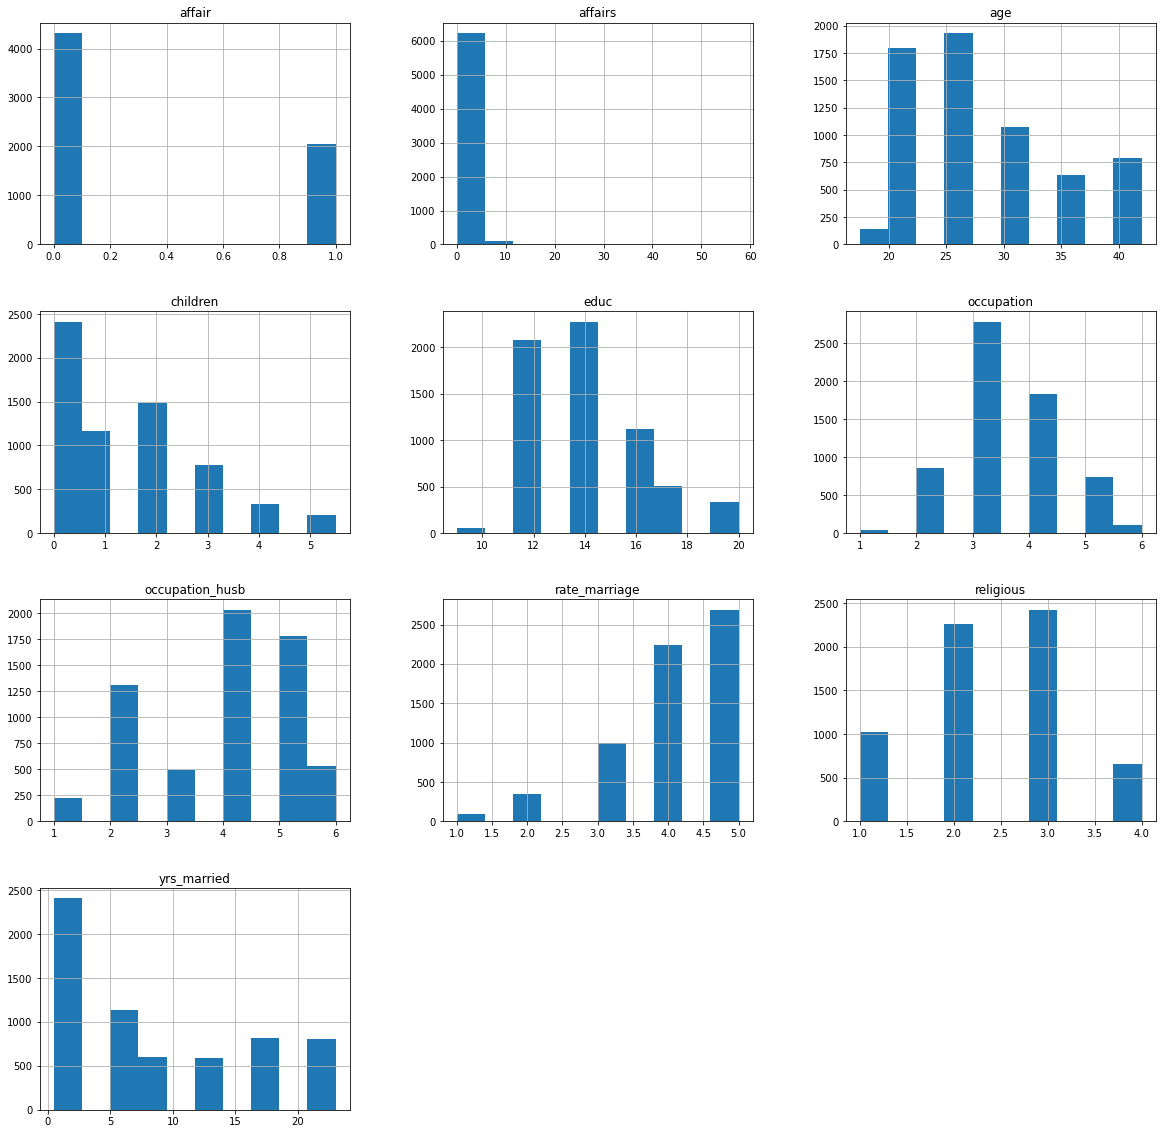

In [16]:
## histograms plot
df.hist(figsize = (20,20))
plt.show()

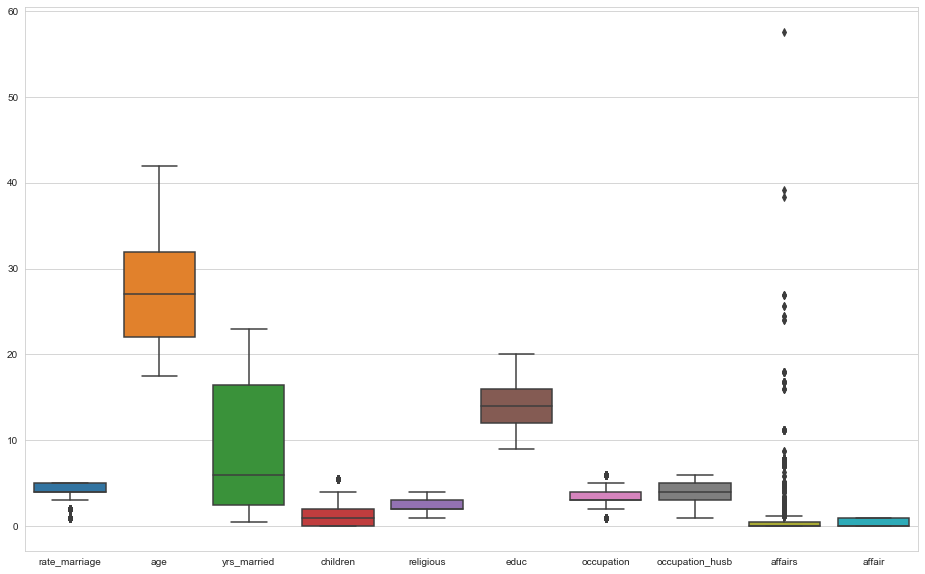

In [17]:
### Check for Outliers using Boxplot
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.boxplot(data = df)
plt.show()

In [18]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column rate_marriage outliers = 7.02%
Column age outliers = 0.00%
Column yrs_married outliers = 0.00%
Column children outliers = 3.19%
Column religious outliers = 0.00%
Column educ outliers = 0.00%
Column occupation outliers = 2.36%
Column occupation_husb outliers = 0.00%
Column affairs outliers = 16.48%
Column affair outliers = 0.00%


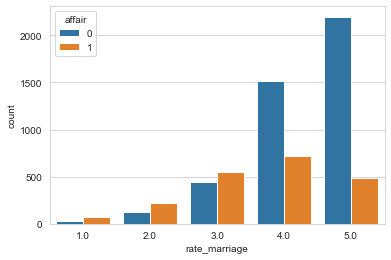

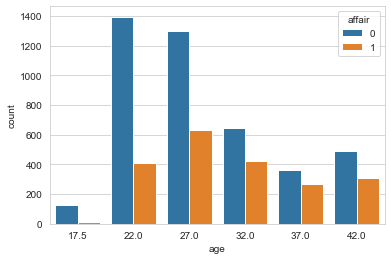

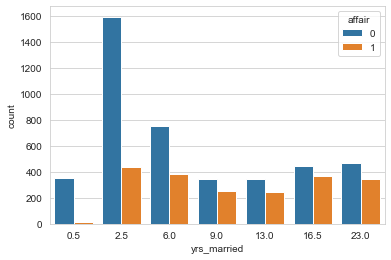

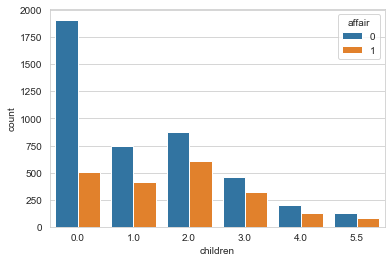

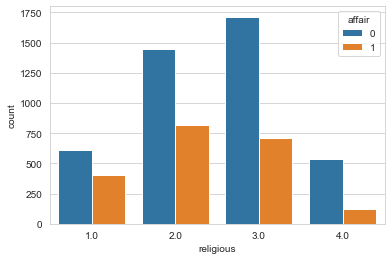

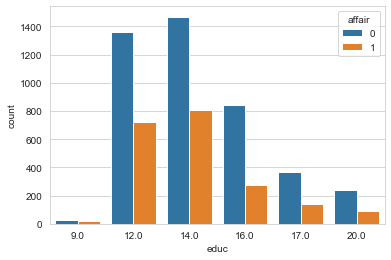

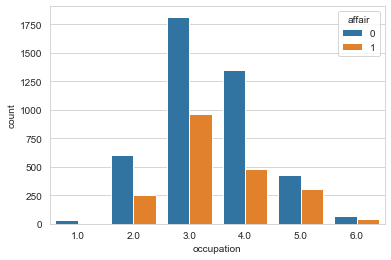

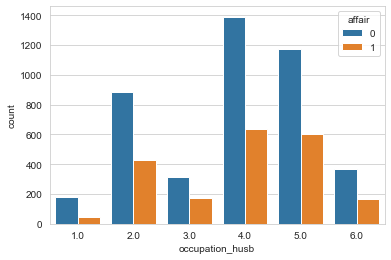

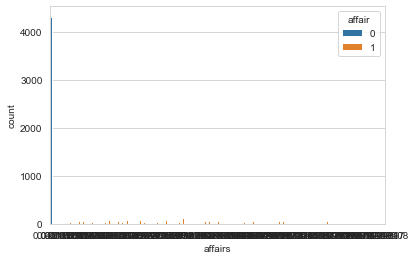

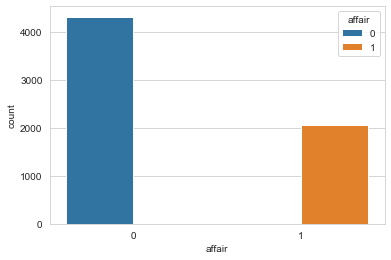

In [19]:
## count plot
for column in df.columns :
    sns.countplot(x = column,data = df , hue = "affair")
    plt.show()

In [20]:
df.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can conclued that Mostly Those Woman are affair whose marriage rate is less than 4 and age above 30 yrs. 

In [21]:
## Check whether dataset is balance/imbalance
df["affair"].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

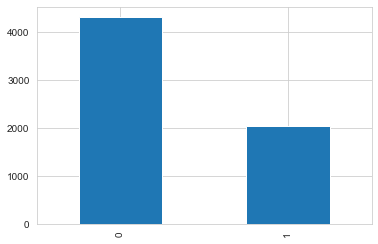

In [22]:
df["affair"].value_counts().plot(kind = 'bar')
plt.show()

The above graph shows that the data is biased towards data points having outcome value as 0 where it means that most womans was not in affair actually. The number of non-affair is almost twice the number of affair woman.

### Split data into independent features and dependent features 

In [23]:
data = df.drop(columns = ["affair"])
y = df["affair"]

### we will do up sampling to balance the dataset

In [24]:
from imblearn.over_sampling import RandomOverSampler
rdm = RandomOverSampler(random_state=42)

In [25]:
data , y = rdm.fit_resample(data,y)
df = pd.concat([data,y],axis=1)  #updating the balanced form of dataset
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)

(4313, 10)
(0, 10)


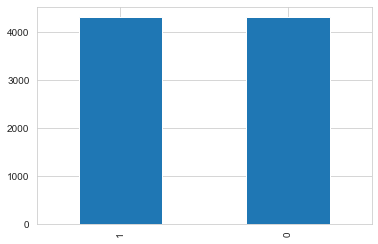

In [26]:
y.value_counts().plot(kind = 'bar')
plt.show()

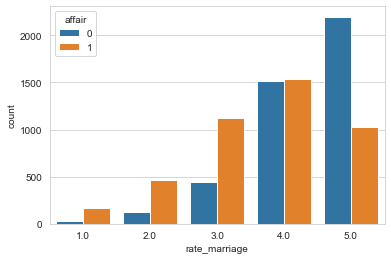

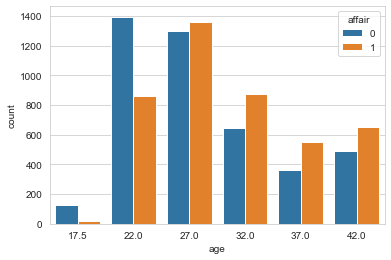

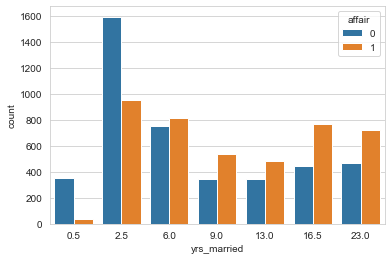

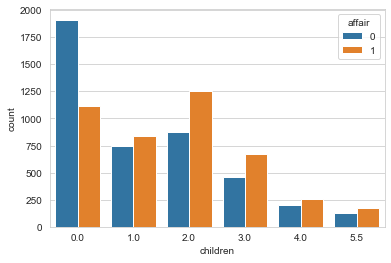

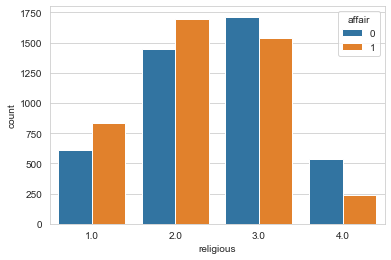

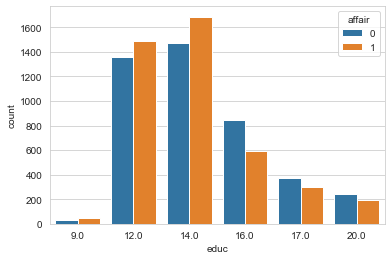

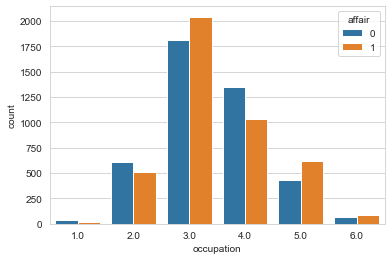

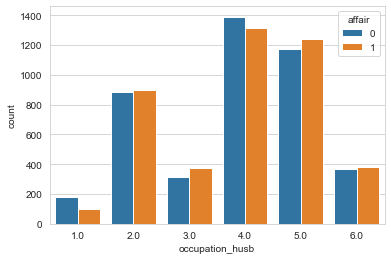

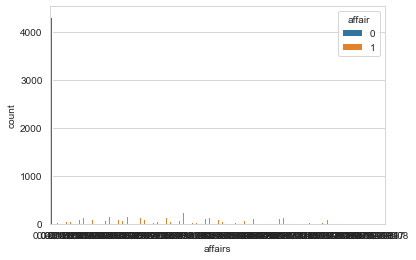

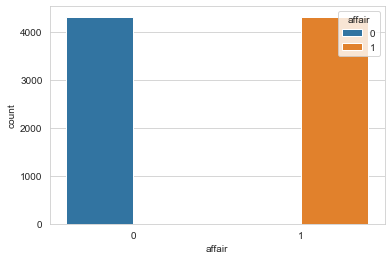

In [27]:
## count plot after balance data
for column in df.columns :
    sns.countplot(x = column,data = df , hue = "affair")
    plt.show()

In [28]:
from sklearn.feature_selection import SelectKBest ,chi2

In [29]:
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2,k = 9)
fit = bestfeatures.fit(data,y)

In [30]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(data.columns)

In [31]:
#concat two dataframes for better visualization 
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns = ['feature','Score']  #naming the dataframe columns

In [32]:
feature_Scores

,feature,Score
0,rate_marriage,253.352250
1,age,331.430947
2,yrs_married,2122.172035
3,children,323.191143
4,religious,48.335630
5,educ,16.091987
6,occupation,1.961202
7,occupation_husb,1.845969
8,affairs,9624.728930


The higher the score more important or relevant is the feature towards our output variable.

In [57]:
# "occupation" and "occupation_husb" columns score are to low So, we remove these two features from our dataset.
updated_data = data.drop(columns = ["occupation","occupation_husb"]) 

### Standardization

In [58]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(updated_data)

In [59]:
X_scaled

array([[-0.97289041,  0.37224359, -0.07102702, ...,  0.70396507,
         1.31095772, -0.37576615],
       [-0.97289041, -0.35893556,  0.47564178, ..., -1.59967783,
        -0.07407387,  0.79104659],
       [ 0.01233531, -1.09011471, -0.95936381, ..., -1.59967783,
         0.84928052,  0.10630319],
       ...,
       [ 0.99756103,  1.10342275,  1.84231376, ...,  0.70396507,
        -0.99742827,  0.62342559],
       [ 0.01233531,  0.37224359,  0.47564178, ...,  1.85578652,
        -0.07407387, -0.31662635],
       [-1.95811614,  0.37224359, -0.07102702, ..., -1.59967783,
         0.84928052,  2.37535436]])

### Check Multi-Collinearity using VIF

In [60]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = updated_data.columns

#let's check the values
vif

,vif,Features
0,1.067210,rate_marriage
1,5.470655,age
2,7.183481,yrs_married
3,2.445613,children
4,1.043224,religious
5,1.108662,educ
6,1.074434,affairs


All the VIF values are less than 10  and are very low. That means no multicollinearity.

### Splits Data into train and test

In [61]:
x_train , x_test , y_train , y_test = train_test_split(X_scaled,y,test_size= 0.25, random_state = 355)

In [62]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((6469, 7), (2157, 7), (6469,), (2157,))

### Implementation of Model

In [63]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred = log_reg.predict(x_test)

In [65]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [66]:
# Accuracy of model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9624478442280946

In [67]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1068,    3],
       [  78, 1008]], dtype=int64)

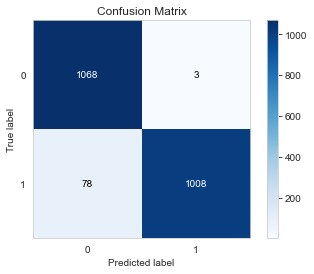

In [68]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [69]:
# r2 score for train data
log_reg.score(x_train,y_train)

0.9591899829958263

In [70]:
# r2 score for test data
log_reg.score(x_test,y_test)

0.9624478442280946

In [71]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9626878375659655

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

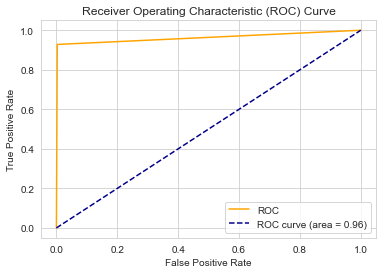

In [73]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Increase Accuracy by using other features

In [74]:
model = LogisticRegression(penalty = "elasticnet" , C = 0.01 , solver = "saga" , max_iter = 1000, l1_ratio = 0.5)

In [75]:
model.fit(x_train,y_train)

LogisticRegression(C=0.01, l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [76]:
model.score(x_test,y_test)

0.8711172925359295

In [77]:
model.score(x_train,y_train)

0.8789611995671665

In [78]:
pred = model.predict(x_test)

In [79]:
# Confusion Matrix
confusion_matrix(y_test,pred)

array([[999,  72],
       [206, 880]], dtype=int64)

In [80]:
# Area Under Curve
auc = roc_auc_score(y_test, pred)
auc

0.8715430923750717

We use log_reg model for prediction bcz its roc curve value is more

In [81]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)